In [1]:
import pandas as pd

blood_transfusion = pd.read_csv("../datasets/blood_transfusion.csv")
target_name = "Class"
data = blood_transfusion.drop(columns=target_name)
target = blood_transfusion[target_name]

In [3]:
data.head()

,Recency,Frequency,Monetary,Time
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77


In [4]:
target.head()

0        donated
1        donated
2        donated
3        donated
4    not donated
Name: Class, dtype: object

In [5]:
target.unique()

array(['donated', 'not donated'], dtype=object)

In [6]:
target.value_counts()

not donated    570
donated        178
Name: Class, dtype: int64

In [8]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate

clf = DummyClassifier(strategy='most_frequent')
cv_results = cross_validate(clf, data, target, cv=10)
cv_results

{'fit_time': array([0.00200462, 0.00199986, 0.00100112, 0.00199938, 0.00300622,
        0.0030067 , 0.00199819, 0.00200057, 0.00200558, 0.00100112]),
 'score_time': array([0.00400758, 0.        , 0.00099993, 0.00098729, 0.00099587,
        0.00099587, 0.00099754, 0.00099993, 0.00299621, 0.00100183]),
 'test_score': array([0.76      , 0.76      , 0.76      , 0.76      , 0.76      ,
        0.76      , 0.76      , 0.76      , 0.77027027, 0.77027027])}

In [9]:
cv_results = cross_validate(clf, data, target, cv=10, scoring='balanced_accuracy')
cv_results

{'fit_time': array([0.00400233, 0.00299144, 0.00200105, 0.00301456, 0.00200653,
        0.00201154, 0.00200224, 0.00100231, 0.00099683, 0.00200129]),
 'score_time': array([0.00499773, 0.00199604, 0.00099921, 0.00100207, 0.00099611,
        0.00204563, 0.00299954, 0.00099659, 0.00199032, 0.00100112]),
 'test_score': array([0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5])}

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [17]:
%%time
clf = KNeighborsClassifier()
cv_results = cross_validate(clf, data, target)
cv_results

Wall time: 126 ms


{'fit_time': array([0.00899982, 0.00600147, 0.0080142 , 0.00698781, 0.00699973]),
 'score_time': array([0.01399827, 0.01300621, 0.01699853, 0.02400327, 0.01499963]),
 'test_score': array([0.41333333, 0.62      , 0.76      , 0.73154362, 0.77181208])}

In [18]:
%%time
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv_results = cross_validate(model, data, target)
cv_results

Wall time: 133 ms


{'fit_time': array([0.0110054 , 0.00899458, 0.00999975, 0.00800037, 0.00899506]),
 'score_time': array([0.0139966 , 0.0170033 , 0.01600409, 0.01299977, 0.01400232]),
 'test_score': array([0.38      , 0.6       , 0.72666667, 0.69798658, 0.77181208])}

In [19]:
model.get_params()

{'memory': None,
 'steps': [('standardscaler', StandardScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'standardscaler': StandardScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'standardscaler__copy': True,
 'standardscaler__with_mean': True,
 'standardscaler__with_std': True,
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighborsclassifier__n_neighbors': 5,
 'kneighborsclassifier__p': 2,
 'kneighborsclassifier__weights': 'uniform'}

In [20]:
%%time
model = make_pipeline(StandardScaler(), KNeighborsClassifier())
cv_results = cross_validate(model, data, target, cv=10, scoring='balanced_accuracy', return_train_score=True)
cv_results

Wall time: 644 ms


{'fit_time': array([0.01400256, 0.00800014, 0.00600028, 0.0109992 , 0.01100183,
        0.00799918, 0.01100039, 0.00899887, 0.006001  , 0.00800228]),
 'score_time': array([0.01400161, 0.01000357, 0.00900221, 0.01100206, 0.00799918,
        0.00700045, 0.01100087, 0.01000094, 0.00599957, 0.01199937]),
 'test_score': array([0.56871345, 0.45321637, 0.46345029, 0.48391813, 0.48245614,
        0.5       , 0.56140351, 0.74561404, 0.50309598, 0.52941176]),
 'train_score': array([0.7160575 , 0.70066399, 0.68093933, 0.70846126, 0.70788865,
        0.71706262, 0.70026194, 0.67076023, 0.69338806, 0.69898781])}

In [21]:
param_range = [1, 2, 5, 10, 20, 50, 100, 200, 500]

In [22]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    model, data, target, param_name='kneighborsclassifier__n_neighbors',
    param_range=param_range, scoring='balanced_accuracy')

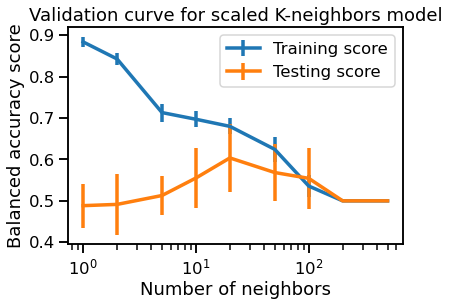

In [26]:
import matplotlib.pyplot as plt
plt.errorbar(param_range, train_scores.mean(axis=1),
             yerr=train_scores.std(axis=1), label='Training score')
plt.errorbar(param_range, test_scores.mean(axis=1),
             yerr=test_scores.std(axis=1), label='Testing score')
plt.legend()

plt.xscale('log')
plt.xlabel("Number of neighbors")
plt.ylabel("Balanced accuracy score")
_ = plt.title("Validation curve for scaled K-neighbors model")